In [1]:
# from torch.utils.data import DataLoader
# import torchvision.transforms as transforms
# import torch
# from data_loading.data_loading import AnimalKeypointsDataset
#
# import numpy as np
# from vis import show_pose
#
# from torch.utils.tensorboard import SummaryWriter

In [2]:
# from set_random_seed import set_random_seed, SEED
#
#
# set_random_seed(SEED)

In [3]:
# from visualization.keypoints import show_keypoints

In [4]:
# # Load data
# batch_size = 10  # Кол-во записей в пакете, передаваемом нейросети за раз
# image_size = (128, 128)  # Размер входного изображения
# # hmap_size = 32
#
# tform = transforms.Compose([  # Объявление трансформации для исходных изображений:
#     transforms.Resize(image_size),  # Рескейл изображений до заданного размера
#     transforms.ToTensor(),  # Приведение исходного изображения к формату тензора
#     # transforms.Normalize([0.5], [0.5]),
# ])
#
# # lsp = LSPet('./models/datasets/lspet_dataset/', transform, image_size)
# # lsp_loader = DataLoader(lsp, batch_size, shuffle=True, num_workers=1)
#
# data = AnimalKeypointsDataset(json_file_path='./dataset/keypoints_annotations.json',
#                               image_dir='./dataset/labeled/',
#                               transform={'image': tform,
#                                'keypoints': transforms.ToTensor()})
#
# cat_train_loader = DataLoader(data, batch_size=batch_size, shuffle=True, num_workers=0)
# #     dl_train.pytorch(
# #     tensors=["images", "keypoints"],
# #     decode_method={'images': 'numpy'},
# #     transform={'images': tform, 'keypoints': None},
# #     batch_size=batch_size, shuffle=False, num_workers=3
# # )

In [5]:
# class MSELoss(torch.nn.Module):  # Лосс-функция средний квадрат ошибок
#
#     def __init__(self):
#         super(MSELoss, self).__init__()
#
#     def forward(self, output, joints):
#         output = output.view(output.shape[0], 16, 2)
#         joints = joints[:, :, :, :-1].view(joints.shape[0], 16, 2)
#         print(output.shape, joints.shape)
#         return torch.sum((output - joints) ** 2)

In [6]:
# class MSECELoss(torch.nn.Module):
#
#     def __init__(self):
#         super(MSECELoss, self).__init__()
#
#     def forward(self, pred, true):
#         pred = pred.view(pred.shape[0], 16, 3)
#         true = true.view(true.shape[0], 16, 3)
#         return torch.nn.functional.mse_loss(pred[:, :, :-1], true[:, :, :-1]) + torch.nn.functional.cross_entropy(pred[:, :, -1], true[:, :, -1])

In [7]:
# # Initialize the model
# set_random_seed(SEED)
# model = LeNet128().cuda()  # Инициализация модели и её выгрузка на ГПУ
# # model.load_state_dict(torch.load('./weights/simplepose9.weights'))  # Загрузка pre-trained weights
# criterion = MSECELoss().cuda()  # Инициализация объекта лосс-функции и его выгрузка на ГПУ
# optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Инициализация оптимизатора

In [8]:
# # Add network into tensorboard
# data = next(iter(lsp_train_loader))
#
# # Создание тензорборда
# tb = SummaryWriter()
# tb.add_graph(model, data[0].cuda())
# # tb.close()

In [9]:
# # Train the model
# for epoch in range(500):
#     for batch, batch_data in enumerate(cat_train_loader):
#
#         model.zero_grad()
#
#         input_image = batch_data['image'].cuda()
#         joints_hmap = batch_data['keypoints'].cuda()
#         # print(joints_hmap.shape, joints_hmap)
#         # mask = batch_data[3].cuda()
#
#         prediction = model(input_image)
#         # print(prediction.shape, prediction)
#
#         prediction = prediction.view(prediction.shape[0], 16, 3)
#         joints_hmap = joints_hmap.view(joints_hmap.shape[0], 16, 3)
#
#         loss = criterion(prediction, joints_hmap)
#         loss.backward()
#         optimizer.step()
#
#         # # Tensorboard
#         # tb.add_scalar('Loss', loss, 1250*epoch + batch)
#
#         if batch == 0:
#             print('Batch: {}, Loss: {}, Epoch: {}'.format(batch, loss.data, epoch))
#             t = transforms.ToPILImage()
#             plt.figure()
#             show_keypoints(t(batch_data['image'][0].cpu()), prediction[0].view(16, 3).squeeze().cpu().detach(), True)
#             # Add keypoints loss of testing data
#
#     # # Tensorboard
#     # for name, weight in model.named_parameters():
#     #     tb.add_histogram(name, weight, epoch)
#     #     tb.add_histogram(f'{name}.grad', weight.grad, epoch)
#
#     torch.cuda.empty_cache()
#     torch.save(model.state_dict(), './weights/LeNet_128x128_batch10{}.weights'.format(epoch))
#
# # tb.close()

In [10]:
# torch.cuda.empty_cache()

In [11]:
# # # lsp_test = LSP('./dataset/lsp_dataset/', transform, image_size)
# #
# # dl_test = deeplake.load("hub://activeloop/lsp-test")
# # lsp_test_loader = dl_test.pytorch(
# #     tensors=["images", "keypoints", "images_visualized"],
# #     decode_method={'images': 'numpy', 'images_visualized': 'numpy'},
# #     transform={'images': tform, 'keypoints': None, 'images_visualized':tform},
# #     batch_size=batch_size, shuffle=False, num_workers=3
# # )
# # #
# # # test_image, *_ = lsp_test_loader.__getitem__(np.random.randint(len(lsp_test_loader)))
# # # test_image, *_ = lsp_test_loader[np.random.randint(len(lsp_test_loader))]
# # test_image, _, test_result = next(iter(lsp_test_loader))
# # pose = model(test_image[3].cuda()).squeeze().cpu().detach()
# # # show_pose(image=test_image[0], pose=test_predictions.squeeze().cpu().detach(), true_image=test_result[0], ignore_joints=None)
#
# sample = data[82]
# test_image, true_kp = sample['image'].unsqueeze(0), sample['keypoints']
# pred_kp = model(test_image.cuda()).squeeze().cpu().detach()
# print(pred_kp[0].detach())
# t = transforms.ToPILImage()
# show_keypoints(t(test_image[0]), pred_kp.view(16, 3), True)

In [12]:
# plt.imshow(batch_data['image'][0].movedim(0, -1))

In [13]:
# import matplotlib.pyplot as plt
#
# pose = pose.view(14, 2)
# plt.imshow(test_image[3].movedim(0, -1))
# for i, j in [(0, 1), (1, 2), (3, 4), (4, 5), (6, 7), (7, 8), (9, 10), (10, 11), (8, 12), (9, 12), (12, 13), (3, 12), (2, 12)]:
#     plt.plot([pose[i][0], pose[j][0]], [pose[i][1], pose[j][1]], '-o', lw=2)

/home/tehnik/coding/pycharm/pytorch_course_animal_pose_estimation
/home/tehnik/coding/pycharm/pytorch_course_animal_pose_estimation/pose_estimation/cats


Global seed set to 17


Train batch: 0, Train batch loss: 492.10687255859375, Epoch: 0
Test loss: 480.707275390625, Epoch: 0


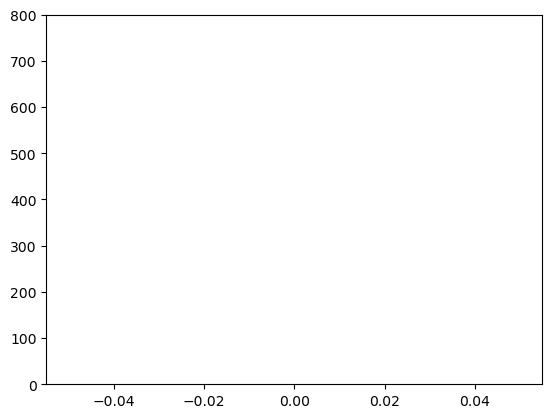

Train batch: 0, Train batch loss: 572.5162963867188, Epoch: 5
Test loss: 397.53839111328125, Epoch: 5


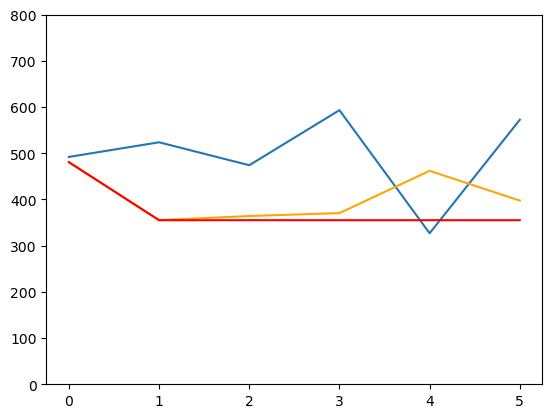

Train batch: 0, Train batch loss: 378.8099060058594, Epoch: 10
Test loss: 502.86724853515625, Epoch: 10


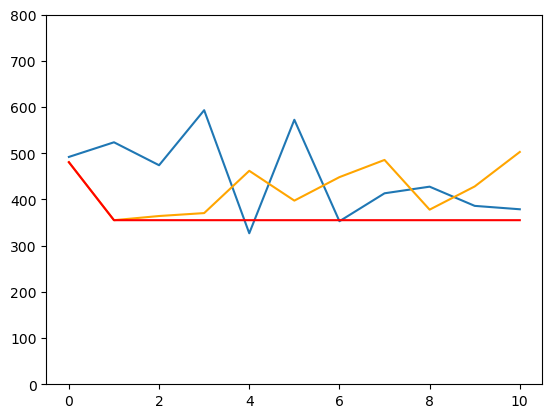

Train batch: 0, Train batch loss: 423.22869873046875, Epoch: 15
Test loss: 410.3014831542969, Epoch: 15


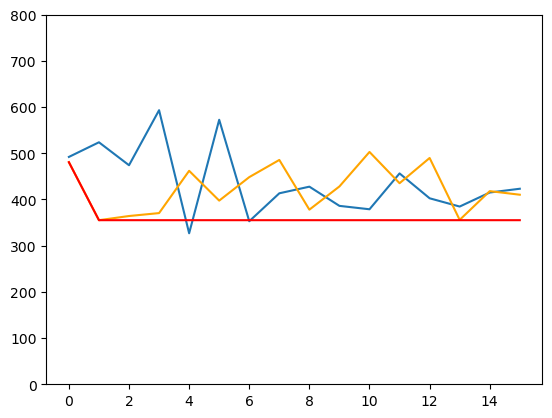

KeyboardInterrupt: 

In [1]:
import torch
import os
%cd ../../
from pose_estimation.cats.train import train_lenet
from models.lenet_128 import LeNet128
%cd ./pose_estimation/cats/


INIT_WEIGHT_PATH = '../../models/weights/lenet_3_128_aug_max/LeNet128_A0o0001_E2500_B200.weights'
ALPHA = 0.00001
IMAGE_SIZE = (128, 128)
EPOCHS = 2000
BATCH_SIZE = 200
LOG_STEP = 5

model = LeNet128().cuda()
if os.path.isfile(INIT_WEIGHT_PATH):
    model.load_state_dict(torch.load(INIT_WEIGHT_PATH))
else:
    print("Weights not found.")

train_lenet(
    model,
    ALPHA,
    IMAGE_SIZE,
    BATCH_SIZE,
    EPOCHS,
    LOG_STEP
)